In [47]:
import pandas as pd
import numpy as np
from tipos.numero import Numero
from tipos.caracter import Caracter
from tipos.categorico import Categorica
from tipos.fecha import Fecha
import matplotlib.pyplot as plt

In [48]:
df_residencia = pd.read_excel('df_residencia_modificada.xlsx')
df_metadatos = pd.read_excel('datos_residencia.xlsx')

In [54]:
df_metadatos.shape

(56798, 9)

In [55]:
df_residencia.shape

(45448, 9)

In [3]:
df_residencia.head()

,Unnamed: 0,LLAVE,TIPO_NIVEL,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,DEPARTAMENTO_RESIDENCIA,DIRECCION_RESIDENCIA,TEL_RESIDENCIA
0,0,314246,POSGRADO,1987-05-21,F,Soltero,NaN,"Calle 80 # 62 - 54, Apto 408",3043891301
1,1,293884,POSGRADO,1982-11-17,F,Soltero,BOGOTA D.C.,CALLE 126 #52 A 92 APTO 811,6240608
2,3,344641,POSGRADO,1989-08-08,M,Soltero,BOGOTA D.C.,CL 52 SUR N? 24A - 35 BL 21 AP 565,7675289
3,4,339861,PREGRADO,1988-02-22,M,NaN,CUNDINAMARCA,MANZANA F CASA N 15 URBANIZACION LA ALEJANDRIA,3203761470
4,5,332394,POSGRADO,1985-10-16,F,Soltero,BOGOTA D.C.,TRANS 86 C # 62 B - 21 SUR,5738128


### Nivel

In [6]:
df_residencia['TIPO_NIVEL'].value_counts()

PREGRADO    39687
POSGRADO     5761
Name: TIPO_NIVEL, dtype: int64

In [7]:
list(df_residencia['TIPO_NIVEL'].value_counts())

[39687, 5761]

In [8]:
list(df_metadatos['TIPO_NIVEL'].value_counts().index)

['PREGRADO', 'POSGRADO']

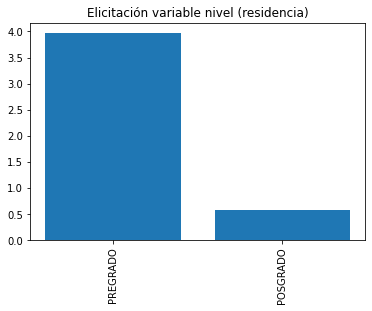

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = np.array(list(df_residencia['TIPO_NIVEL'].value_counts()))/10000
bars = ['PREGRADO', 'POSGRADO']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable nivel (residencia)')

# Show graphic
plt.show()

In [9]:
nivel = Categorica(df_residencia['TIPO_NIVEL'])

In [10]:
print(nivel.evaluacion_exactitud(distribucion_teorica=[7170, 49628], categorias_teoricas=['POSGRADO', 'PREGRADO']))
print(nivel.evaluacion_completitud())
print(nivel.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 81.42%
El porcentaje de completitud para la variable es de 100.0%
El porcentaje de consistencia para la variable es de 100.0%


### Fecha nacimiento

In [92]:
from datetime import datetime
print(max(df_metadatos['FECHA_NACIMIENTO']))
print(min(df_metadatos['FECHA_NACIMIENTO']))
a = np.array(df_metadatos['FECHA_NACIMIENTO'])
fecha = pd.Series(a)
fecha = pd.to_datetime(fecha, format = "%Y-%m-%d")
hoy = np.datetime64(datetime.now().date())
diferencia_fechas = hoy - fecha
diferencia_fechas = diferencia_fechas.astype('timedelta64[Y]')
distribucion_empirica = np.histogram(diferencia_fechas, bins="sturges")[0]
print(distribucion_empirica)

2006-08-01 00:00:00
1944-07-03 00:00:00
[ 6429 26157 11751  6871  2717  1041   849   432   208   139   108    35
    26    23     4     6     2]


In [93]:
print(list(distribucion_empirica))

[6429, 26157, 11751, 6871, 2717, 1041, 849, 432, 208, 139, 108, 35, 26, 23, 4, 6, 2]


array([6.4290e+00, 2.6157e+01, 1.1751e+01, 6.8710e+00, 2.7170e+00,
       1.0410e+00, 8.4900e-01, 4.3200e-01, 2.0800e-01, 1.3900e-01,
       1.0800e-01, 3.5000e-02, 2.6000e-02, 2.3000e-02, 4.0000e-03,
       6.0000e-03, 2.0000e-03])

Text(0.5, 1.0, 'Elicitación variable fecha nacimiento (residencia)')

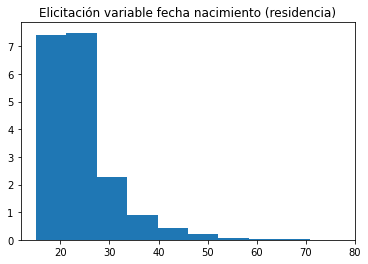

In [120]:
plt.hist(diferencia_fechas, weights=diferencia_fechas/70000)
plt.title('Elicitación variable fecha nacimiento (residencia)')

In [59]:
fecha = Fecha(valores=df_residencia['FECHA_NACIMIENTO'])

In [62]:
print(fecha.evaluacion_exactitud(minimo_teorico="1944-07-03", maximo_teorico="2006-08-01",\
                             distribucion_teorica=[6477, 26137, 11757, 6846, 2709, 1043, 846, 432, 208, 139, 108, 35, 26, 23, 4, 6, 2], suma_reglas=None,\
                                  frecuencia="años"))
print(fecha.evaluacion_completitud())
print(fecha.evaluacion_accesibilidad(acceso=1,plantilla=1, presentacion=1,restriccion=1))
print(fecha.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 100.0%
El porcentaje de completitud para la variable es de 100.0%
El porcentaje de accesibilidad para la variable es de 90.0%
El porcentaje de consistencia para la variable es de 100.0%


### Sexo

In [15]:
df_metadatos['SEXO'].value_counts()

M    34320
F    22478
Name: SEXO, dtype: int64

In [16]:
list(df_metadatos['SEXO'].value_counts())

[34320, 22478]

In [17]:
list(df_metadatos['SEXO'].value_counts().index)

['M', 'F']

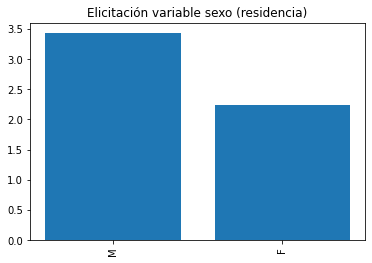

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = np.array(list(df_metadatos['SEXO'].value_counts()))/10000
bars = ['M', 'F']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable sexo (residencia)')

# Show graphic
plt.show()

In [18]:
sexo = Categorica(df_residencia['SEXO'])

In [19]:
np.array([22478, 34320])/56798

array([0.39575337, 0.60424663])

In [20]:
print(sexo.evaluacion_exactitud(distribucion_teorica=[3.95, 6.04], categorias_teoricas=['F', 'M']))
print(sexo.evaluacion_completitud())
print(sexo.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 68.64%
El porcentaje de completitud para la variable es de 100.0%
El porcentaje de consistencia para la variable es de 100.0%


### Estado civil

In [21]:
df_estado_civil = pd.DataFrame(df_metadatos['ESTADO_CIVIL'].value_counts())
df_estado_civil.reset_index(inplace=True)

In [22]:
df_estado_civil.sort_values('index')['ESTADO_CIVIL'].tolist()

[719, 5, 171, 10, 90, 55055, 651, 27]

In [23]:

suma = sum(df_estado_civil.sort_values('index')['ESTADO_CIVIL'].tolist())
numerador = np.array(df_estado_civil.sort_values('index')['ESTADO_CIVIL'].tolist())

In [24]:
list(map(lambda x: round(x, 4), list((numerador / suma)*10)))

[0.1267, 0.0009, 0.0301, 0.0018, 0.0159, 9.7051, 0.1148, 0.0048]

In [25]:
print(df_estado_civil.sort_values('index')['index'].tolist())

['Casado', 'Divorciado', 'No Definido', 'Religioso', 'Separado', 'Soltero', 'Unión Libre', 'Viudo']


In [26]:
print(list(map(lambda x: x.upper().strip(), (sorted(pd.DataFrame(df_residencia['ESTADO_CIVIL'].value_counts()).index)))))

['CASADO', 'DIVORCIADO', 'NO DEFINIDO', 'RELIGIOSO', 'SEPARADO', 'SOLTERO', 'UNIÓN LIBRE', 'VIUDO']


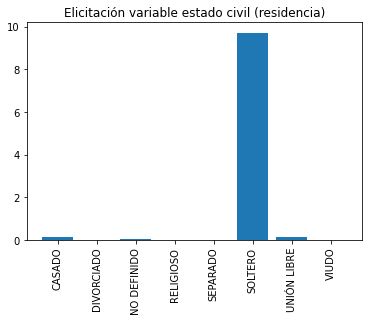

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = [0.1267, 0.0009, 0.0301, 0.0018, 0.0159, 9.7051, 0.1148, 0.0048]
bars = ['CASADO', 'DIVORCIADO', 'NO DEFINIDO', 'RELIGIOSO', 'SEPARADO', 'SOLTERO', 'UNIÓN LIBRE', 'VIUDO']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable estado civil (residencia)')

# Show graphic
plt.show()

In [27]:
estado_civil = Categorica(df_residencia['ESTADO_CIVIL'])

In [28]:
print(estado_civil.evaluacion_exactitud(distribucion_teorica=[0.1267, 0.0009, 0.0301, 0.0018, 0.0159, 9.7051, 0.1148, 0.0048]\
, categorias_teoricas=['CASADO', 'DIVORCIADO', 'NO DEFINIDO', 'RELIGIOSO', 'SEPARADO', 'SOLTERO', 'UNION LIBRE', 'VIUDO']))
print(estado_civil.evaluacion_completitud())
print(estado_civil.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 98.94%
El porcentaje de completitud para la variable es de 94.88%
El porcentaje de consistencia para la variable es de 74.34%


### Departamento residencia	

In [50]:
df_departamento_residencia = pd.DataFrame(df_metadatos['DEPARTAMENTO_RESIDENCIA'].value_counts())
df_departamento_residencia.reset_index(inplace=True)

In [51]:
print(df_departamento_residencia.sort_values('index')['DEPARTAMENTO_RESIDENCIA'].tolist())

[197, 3128, 284, 45, 8771, 77, 412, 2795, 63, 263, 142, 337, 20, 113, 1281, 37, 12, 61, 65, 182, 23, 147, 785, 76, 347, 80, 176, 89, 151, 54, 288, 980, 23, 6]


In [52]:

suma = sum(df_departamento_residencia.sort_values('index')['DEPARTAMENTO_RESIDENCIA'].tolist())
numerador = np.array(df_departamento_residencia.sort_values('index')['DEPARTAMENTO_RESIDENCIA'].tolist())

In [69]:
print(list(map(lambda x: round(x, 4), list((numerador / suma)*10))))

[0.0916, 1.4542, 0.132, 0.0209, 4.0776, 0.0358, 0.1915, 1.2994, 0.0293, 0.1223, 0.066, 0.1567, 0.0093, 0.0525, 0.5955, 0.0172, 0.0056, 0.0284, 0.0302, 0.0846, 0.0107, 0.0683, 0.3649, 0.0353, 0.1613, 0.0372, 0.0818, 0.0414, 0.0702, 0.0251, 0.1339, 0.4556, 0.0107, 0.0028]


In [70]:
print(df_departamento_residencia.sort_values('index')['index'].tolist())

['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA D.C.', 'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'DPTO EXTRANJERO', 'GUAINIA', 'GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VICHADA']


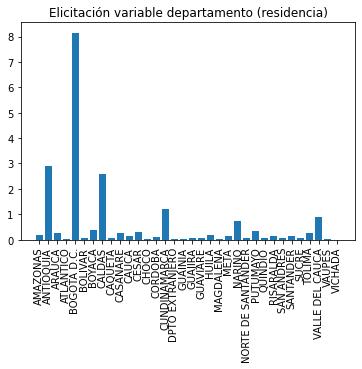

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = list(map(lambda x: round(x, 4), list((numerador / suma)*20)))
bars = df_departamento_residencia.sort_values('index')['index'].tolist()
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable departamento (residencia)')

# Show graphic
plt.show()

In [34]:

departamento = Categorica(df_residencia['DEPARTAMENTO_RESIDENCIA'])

In [35]:
print(departamento.evaluacion_exactitud(distribucion_teorica=[0.0916, 1.4542, 0.132, 0.0209, 4.0776, 0.0358, 0.1915, 1.2994, 0.0293, 0.1223, 0.066,\
     0.1567, 0.0093, 0.0525, 0.5955, 0.0172, 0.0056, 0.0284, 0.0302, 0.0846, 0.0107, 0.0683, 0.3649, 0.0353, 0.1613, 0.0372,\
          0.0818, 0.0414, 0.0702, 0.0251, 0.1339, 0.4556, 0.0107, 0.0028]\
, categorias_teoricas=['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA D.C.', 'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA',\
     'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'DPTO EXTRANJERO', 'GUAINIA', 'GUAJIRA', 'GUAVIARE',\
          'HUILA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES',\
               'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VICHADA']))
print(departamento.evaluacion_completitud())
print(departamento.evaluacion_consistencia(tildes=False,  minusculas=False, espacio = True))

El porcentaje de exactitud para la variable es de 100.0%
El porcentaje de completitud para la variable es de 37.8%
El porcentaje de consistencia para la variable es de 100.0%


### Telefono residencia

In [36]:
telefono = Caracter(df_residencia['TEL_RESIDENCIA'])

In [40]:
categorias_teoricas = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '(', ')', '+')
diccionario_dominios = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}
estandar = 'numero'

In [41]:
print(telefono.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas, letras=False))
print(telefono.evaluacion_completitud()) 
print(telefono.evaluacion_exactitud(numeros=True, letras=False, longitud=10))

El porcentaje de consistencia para la variable es de 98.78%
El porcentaje de completitud para la variable es de 33.5%
El porcentaje de exactitud para la variable es de 99%


### Dirección de procedencia

In [4]:

direccion = Caracter(df_residencia['DIRECCION_RESIDENCIA'])

In [5]:
categorias_teoricas_direccion = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'none', 'CL.', 'CRA.',\
      'DIG.', 'TRAV.', '#', 'A', 'B', 'C', 'D', 'E', '-')
diccionario_dominios_direccion = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , 'CL.':'nomenclatura', 'CRA.':'nomenclatura', 'DIG.':'nomenclatura', 'TRAV.':'nomenclatura', '#':'numeral',
     'A':'letra', 'B':'letra', 'C':'letra', 'D':'letra', 'E':'letra', '-':'separador'}
estandar_direccion = "nomenclatura numero letra numeral numero separador numero"

In [6]:
print(direccion.evaluacion_exactitud(numeros=True, letras=True))
print(direccion.evaluacion_completitud())
print(direccion.evaluacion_consistencia(estandar=estandar_direccion, diccionario_dominios=diccionario_dominios_direccion,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_direccion, letras=True))

El porcentaje de exactitud para la variable es de 95%
El porcentaje de completitud para la variable es de 43.77%
El porcentaje de consistencia para la variable es de 42.47%


# Estandarización de datos

### Dirección

In [7]:
from tipos.estandarizar_direccion import arreglar_direccion
categorias_teoricas = ('CL.', 'CRA.', 'DIG.', 'TRAV.')

direcciones_buenas = []
for i in df_residencia['DIRECCION_RESIDENCIA']:
    direcciones_buenas.append(arreglar_direccion(str(i), categorias_teoricas))

In [25]:
df_residencia['DIRECCION_RESIDENCIA'] = direcciones_buenas

### Telefono residencia

In [10]:
from tipos.estandarizar_numero_telefono import estandar_numero

In [11]:
celular_bueno = []
for i in df_residencia['TEL_RESIDENCIA']:
    celular_bueno.append(estandar_numero(str(i)))

In [27]:
df_residencia['TEL_RESIDENCIA'] = celular_bueno

### Estado civil

In [13]:
from tipos.estandarizar_cadena import arreglar_cadena

In [40]:
estado_civil_bueno = []
for i in df_residencia['ESTADO_CIVIL']:
    estado_civil_bueno.append(arreglar_cadena(str(i), mayuscular=True, minuscular=False, espacios=True))

In [41]:
df_residencia['ESTADO_CIVIL'] = estado_civil_bueno

# Evaluación de metricas despues de limpiar datos

### Dirección

In [16]:
direccion = Caracter(df_residencia['DIRECCION_RESIDENCIA'])

In [28]:
print(direccion.evaluacion_consistencia(estandar=estandar_direccion, diccionario_dominios=diccionario_dominios_direccion,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_direccion, letras=True))

El porcentaje de consistencia para la variable es de 52.31%


In [35]:
print(direccion.evaluacion_exactitud(numeros=True, letras=True))

El porcentaje de exactitud para la variable es de 99%


### Celular

In [36]:
celular = Caracter(df_residencia['TEL_RESIDENCIA'])

In [37]:
categorias_teoricas_celular = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '(', ')', '+')
diccionario_dominios_celular = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}
estandar = 'numero'

In [38]:
print(celular.evaluacion_exactitud(numeros=True, letras=False, longitud=10))
print(celular.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

El porcentaje de exactitud para la variable es de 99%
El porcentaje de consistencia para la variable es de 99.83%


### Estado civil

In [42]:
estado_civil = Categorica(df_residencia['ESTADO_CIVIL'])

In [45]:
print(estado_civil.evaluacion_consistencia())

El porcentaje de consistencia para la variable es de 99.65%


# Exportar base lista

In [46]:
df_residencia.to_excel('residencia_final.xlsx')